# Numpy
是高性能科学计算和数据分析的基础包。是本书几乎所有高级工具构建的基础。部分功能如下
+ ndarray：多维数组
+ 用于对整组数据进行快速运算的彼岸准数学函数
+ 线性代数，随机数生成以及傅里叶变换功能
+ 用于集成由C，C++，Fortran等语言等语言编写的代码的工具。

他它提供了一个简单易用的C API，很容易将数据传递给外部库。外部库也能以Numpy数组的形式传递给Python。

对于大部分数据分析应用，最关注的功能集中在：
+ 用于数据整理和清理、子集构造和过滤、转换等快速的矢量化数组运算
+ 常用的数组算法，如排序、唯一化、集合运算
+ 高效的描述统计和数据聚合/摘要运算
+ 用于异构数据集的合并/连接运算的数据对齐和关系型数据运算
+ 将条件逻辑表述为数组表达式（而不是带有if-elif-else分支的循环）
+ 数组的分组运算(聚合、转换、函数应用)


In [4]:
import numpy as np

## Numpy的ndarray：一种多维数组对象

本书中看到”数组“、”Numpy数组“、”ndarray“时，均指ndarray对象

## 1.创建ndarray

最简单的方式，array函数，接受一切序列型对象

In [5]:
data1 = [6, 7.5, 8, 0, 1]
arr1 = np.array(data1)
arr1

array([6. , 7.5, 8. , 0. , 1. ])

嵌套序列转化为多维数组

In [6]:
data2 = [[1,2,3,4,],[5,6,7,8]]
arr2 = np.array(data2)
arr2

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [7]:
arr2.ndim

2

In [8]:
arr2.shape

(2, 4)

In [9]:
print(arr1.dtype)
print(arr2.dtype)

float64
int64


In [10]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [11]:
np.zeros((3, 6))

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [12]:
np.empty((2, 3, 2))

array([[[1.5816251e-316, 0.0000000e+000],
        [0.0000000e+000, 0.0000000e+000],
        [0.0000000e+000, 0.0000000e+000]],

       [[0.0000000e+000, 0.0000000e+000],
        [0.0000000e+000, 0.0000000e+000],
        [0.0000000e+000, 0.0000000e+000]]])

In [13]:
np.arange(15)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

 ## 数组转置和轴对换

In [14]:
arr = np.arange(15).reshape((3,5))

In [15]:
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [16]:
arr.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

In [17]:
arr = np.random.randn(6,3)

进行矩阵运算常常需要该操作，比如用np.dot计算矩阵内积$X^TX$

In [18]:
np.dot(arr.T,arr)

array([[ 7.67771999, -3.20871593, -1.26359708],
       [-3.20871593,  4.91057335, -0.32969323],
       [-1.26359708, -0.32969323,  2.34343542]])

对于高位数组，tranpose需要得到一个由轴编号组成的元组才能对这些轴进行转置（比较费脑子）

In [19]:
arr = np.arange(16).reshape(2,2,4)
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [20]:
arr.transpose((1,0,2))

array([[[ 0,  1,  2,  3],
        [ 8,  9, 10, 11]],

       [[ 4,  5,  6,  7],
        [12, 13, 14, 15]]])

## 通用函数：快速的元素级数组函数

通用函数（ufunc）是一种对ndarray中的数据执行元素级运算的函数。你可以将其看做简单的函数（接受一个或多个标量值，并产生一个或者多个标量值）的矢量化包装器

In [21]:
arr = np.arange(10)
np.sqrt(arr)

array([0.        , 1.        , 1.41421356, 1.73205081, 2.        ,
       2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ])

In [22]:
np.exp(arr)

array([1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 2.00855369e+01,
       5.45981500e+01, 1.48413159e+02, 4.03428793e+02, 1.09663316e+03,
       2.98095799e+03, 8.10308393e+03])

这些都是 一元ufunc。另外一些（如add或maximum）接受2个数组，并返回一个结果数组

In [23]:
from numpy.random import randn
x = randn(8)
y = randn(8)
x

array([-0.57374136, -1.40756123, -0.12354018,  1.45840628, -0.43309531,
        1.08387071, -0.76496374,  1.39144428])

In [25]:
np.maximum(x,y)

array([-0.57374136, -0.85198106, -0.12354018,  1.45840628,  1.53910504,
        1.08387071,  0.39896076,  1.39144428])

有的ufunc可以返回多个数组。modf就是一个例子，

In [28]:
arr = randn(7)*5 # rand normal从正态分布中选取
np.modf(arr)

(array([-6.87959847e-01, -9.84484289e-01, -9.56766920e-01, -9.58819609e-01,
         3.06650329e-01,  7.75636450e-01, -1.76992049e-04]),
 array([ -7.,  -5., -10.,  -3.,  11.,   2.,  -0.]))

In [27]:
arr

array([ 0.48470247, -1.55146684,  1.01654267,  2.17376898, -6.58722411,
       -1.41005167, -3.74904597])

### 一元ufunc
+ abs：计算绝对值
+ sqrt：计算各元素的平方根。相当于arr**5
+ square：计算各元素的平方。
+ exp：计算各元素的指数$e^x$
+ log,log10,log2,log1p：分别为$\ln,\lg,\log_2,\log{(1+x)}$
+ sign：计算各元素的正负号，1为正数，0为0，-1为负数
+ ceil：计算各元素的ceiling值，向上取整
+ floor：计算各元素的floor值，向下取整
+ rint：将个元素四舍五入，保留dtype
+ modf：返回将小数部分和整数部分以两个数组的形式返回
+ isnan：返回一个bool型数组，NaN的为1，不是的为0
+ isfinite，isinf：返回一个bool型数组，”哪些值是NaN“
+ cos,cosh,sin,cinh,tan,tanh：普通型和双曲型三角函数
+ arccos,arccosh,arcsin,arcsinh,arctan,arctanh：反三角函数
+ logical_not：计算各元素not x的真值。相当于-arr


### 二元ufunc
+ add：数组中对应元素相加
+ substract：A-B
+ multiply：数组元素相乘
+ divide,floor_divide：除法向下圆整除法（丢弃余数）
+ power：对第一个数组中的元素A，根据第二个数组中相应的B，计算$A^B$
+ maximun,fmax：元素级的最大值计算。fmax将忽略NaN
+ minimun,fmin：最小值
+ mod：元素级求模运算
+ copysign：将第二个数组中的值得符号赋值给第一个数组中的值
+ greater、grater_equal、less、less_equal：元素级别的比较运算
+ logical_and,logical_or,logical_xor：执行元素级别的真值逻辑运算。相当于$&,|,^$

## 利用数组进行数据处理
Numpy数组的很多操作可以将复杂的任务表述为简洁的数组表达式（否则需要编写循环）。

用数组表达式代替循环的做法，通常称为矢量化。一般来说，矢量化数组运算要比纯python方法快一到两个数量级，尤其是数值运算。

我们要计算函数`sqrt(x^2 + y^2)`。`np.meshgrid`函数接受两个一维数组，并产生两个二维矩阵（对应于两个数组中所有的（x,y）对）：

In [35]:
arr = np.arange(5)
xs, ys = np.meshgrid(arr, arr)

In [38]:
arr

array([0, 1, 2, 3, 4])

In [36]:
xs

array([[0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4]])

In [37]:
ys

array([[0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2],
       [3, 3, 3, 3, 3],
       [4, 4, 4, 4, 4]])

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline
z = np.sqrt(xs**2+ys**2)
z

array([[0.        , 1.        , 2.        , 3.        , 4.        ],
       [1.        , 1.41421356, 2.23606798, 3.16227766, 4.12310563],
       [2.        , 2.23606798, 2.82842712, 3.60555128, 4.47213595],
       [3.        , 3.16227766, 3.60555128, 4.24264069, 5.        ],
       [4.        , 4.12310563, 4.47213595, 5.        , 5.65685425]])

> plt热图画法，`imshow(data, cmap=None)`，cmap用于设置热图的颜色map
> + hot：从黑平滑过渡到红橙黄白
> + cool：青绿到品红
> + gray：线性灰度图
> + bone：较高蓝色成分的灰度图
> + white：全白
> + sprint:
> + summer:
> + autumn:
> + winter:



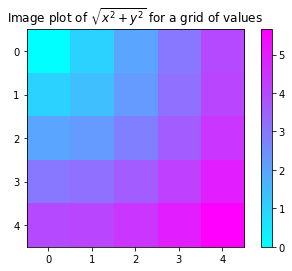

In [48]:
plt.imshow(z, cmap=plt.cm.cool)
plt.colorbar()
plt.title("Image plot of $\sqrt{x^2+y^2}$ for a grid of values")
plt.show()

## 将条件逻辑表述为数组运算
`numpy.where`函数式三元表达式`x if condition else y`的矢量化版本。假设我们有一个布尔数组和两个值数组

In [51]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

 要根据cond中的值选取xarr和yarr的值，当cond中的值为True时，选取xarr的值，否则从yarr中选取。列表推导式写法如下

In [52]:
result = [(x if c else y) for x, y, c in zip(xarr, yarr, cond)]
result

[1.1, 2.2, 1.3, 1.4, 2.5]

存在问题：
+ 对大数组的处理速度慢，
+ 无法用于多维数组，若使用np.where则可以将该功能写得简洁：

In [53]:
result = np.where(cond, xarr, yarr)
result

array([1.1, 2.2, 1.3, 1.4, 2.5])

np.where的第二个和第三个参数不必是数组，可以是标量值，where常用于根据另一个数组生成新的数组。假设从一个随机数数组中将正值替换为2，负值替换为-2

In [54]:
arr = randn(4, 4)
np.where(arr > 0, 2, -2)

array([[ 2, -2, -2, -2],
       [ 2, -2, -2,  2],
       [-2,  2,  2,  2],
       [-2,  2,  2, -2]])

In [55]:
np.where(arr>0,2,arr) #只将正值设置为2

array([[ 2.        , -1.70544389, -0.09238753, -0.78596189],
       [ 2.        , -0.70875219, -0.80573741,  2.        ],
       [-0.83281092,  2.        ,  2.        ,  2.        ],
       [-1.60790653,  2.        ,  2.        , -1.99901752]])

传给where的数组大小可以不相等，甚至可以是标量值

更复杂的逻辑，有两个布尔型数组cond1和cond2，希望根据四种不同的布尔值组合实现不同的赋值操作

In [62]:
cond1 = np.array([1, 0, 1, 0])
cond2 = np.array([0, 0, 1, 1])

In [60]:
result = []
for i in range(4):
    if cond1[i] and cond2[i]:
        result.append(0)
    elif cond1[i]:
        result.append(1)
    elif cond2[i]:
        result.append(2)
    else:
        result.append(3)

 虽然不是太明显，这个循环可以写成np.where的嵌套形式

In [63]:
np.where(cond1 & cond2,0,
         np.where(cond1, 1,
                  np.where(cond2,2,3)))

array([1, 3, 0, 2])

In [66]:
3 - 2 * cond1 - cond2

array([1, 3, 0, 2])

## 数字和统计方法
可以通过数组上的一组数字函数对整个数组或某个轴向的数组进行统计计算。sum、mean以及标准差std等聚合计算（aggregation，常叫做reudction）


In [67]:
arr = np.random.randn(5, 4)
arr.mean()

0.1809094705210683

In [69]:
print(np.mean(arr))
print(arr.mean())

0.1809094705210683
0.1809094705210683


mean和sum这类的函数可以接受一个axis参数（用于计算该轴向的统计值），最终结果是一个少一维的数组：

In [70]:
arr.mean(axis=1)

array([-3.89348592e-01,  1.93064469e-02,  7.00827603e-04,  5.25152978e-01,
        7.48735692e-01])

In [71]:
arr.sum(0)

array([-1.17704173,  1.41596737, -0.91767502,  4.2969388 ])

In [75]:
arr = np.array([[0,1,2],[3,4,5],[6,7,8]])
print(arr)
arr.cumsum(0)

[[0 1 2]
 [3 4 5]
 [6 7 8]]


array([[ 0,  1,  2],
       [ 3,  5,  7],
       [ 9, 12, 15]])

arr.cumsum()，按行或者按列累加

arr.cumprod()，按行或者按列累加

In [74]:
arr.sum(0)

array([ 9, 12, 15])

In [76]:
arr.cumprod(1)

array([[  0,   0,   0],
       [  3,  12,  60],
       [  6,  42, 336]])

基本数组统计方法
+ sum：对数组中全部或某轴向的元素求和。零长度的数组的sum为0
+ mean：算术平均数
+ std、var：分别为标准差和方差，自由度可调
+ min、max：最大值和最小值
+ argmin、argmax：分别为最大和最小元素的索引
+ cumsum：所有元素的累积和
+ cumprod：所有元素的累积和

## 用于布尔型数组的方法
在上面方法中，布尔值会被强制转换为1（True）和0（False)

因此，sum常用于计算True计数

In [78]:
arr = randn(100)
(arr > 0).sum()# 正值的数量

56

此外还有两个方法any和all，他们对布尔型数组非常有用。

+ any用于测试数组中是否存在一个或者多个True，而all测试所有值是否d

In [80]:
bools = np.array([False, False, True, True])
print(bools.any())
print(bools.all())

True
False


## 排序
NumPy数组也可以通过sort方法就地排序：

In [81]:
arr = randn(8)
arr

array([ 1.31436237,  0.42432567, -0.313671  ,  0.12421498,  1.0152972 ,
        0.40709695,  0.08719938, -0.58555021])

In [82]:
arr.sort()
arr

array([-0.58555021, -0.313671  ,  0.08719938,  0.12421498,  0.40709695,
        0.42432567,  1.0152972 ,  1.31436237])

In [83]:
arr = randn(5, 3)
arr

array([[-1.08496935, -0.80551926,  0.90994393],
       [ 1.30567045,  0.83784153, -0.2016176 ],
       [-0.34857167, -1.03526864,  1.29976452],
       [ 0.28913812,  1.36656004,  2.25337791],
       [ 0.27688524,  0.92079123, -1.35037314]])

In [84]:
arr.sort(1)
arr

array([[-1.08496935, -0.80551926,  0.90994393],
       [-0.2016176 ,  0.83784153,  1.30567045],
       [-1.03526864, -0.34857167,  1.29976452],
       [ 0.28913812,  1.36656004,  2.25337791],
       [-1.35037314,  0.27688524,  0.92079123]])

In [87]:
large_arr = randn(100000)
large_arr.sort()

large_arr[int(0.05 * len(large_arr))]

-1.6536283042321915

## 唯一化以及其他的集合逻辑
numpy提供了一些针对以为ndarray的基本集合运算。最常用的是np.unique了。
它用于找出数组中的唯一值并返回已排序的结果

In [88]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
np.unique(names)

array(['Bob', 'Joe', 'Will'], dtype='<U4')

In [89]:
ints = np.array([3, 3, 2,2,1,1,4,4])
np.unique(ints)

array([1, 2, 3, 4])

In [90]:
sorted(set(names))

['Bob', 'Joe', 'Will']

另一个函数np.in1d用于测试一个数组中的值在另一个数组中的成员资格，返回一个布尔型数组：

In [91]:
values = np.array([6,0,0,3,2,5,6])
np.in1d(values, [2,3,6])

array([ True, False, False,  True,  True, False,  True])

In [93]:
values = np.array([6,0,0,3,2,5,6])
np.in1d(values, [2,3,6])

array([ True, False, False,  True,  True, False,  True])

### 数组的集合运算
+ unique(x):计算集合中的唯一元素，并返回**有序**结果
+ insert1d(x,y):计算x,y中的公共元素，并返回**有序**结果
+ union1d(x,y):计算x,y的并集，并返回**有序**结果
+ in1d(x,y):得到一个x中的元素是否包含于y的布尔型数组
+ setdiff1d(x,y):集合的差，即元素在x中且不在y中
+ setxor1d(x,y):集合的对称差，即存在于一个数组中的但不同是存在于两个数组中

## 用于数组的文件输入输出
NumPy能够读写瓷盘上的文本数据或二进制数据

## 将数组以二进制格式保存到磁盘

np.save和np.load是读写磁盘数组数据的两个主要函数。保存为.npy文件

In [94]:
arr = np.arange(10)
np.save('some_array', arr)

In [95]:
np.load('some_array.npy')

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [98]:
np.savez('array_archive.npz', a=arr, b=arr)
arch = np.load('array_archive.npz')
arch['b']

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

## 线性代数

线性代数（矩阵乘法、矩阵分解，行列式以及其他方阵数学）是任何数组库的重要组成部分。

NumPy提供了一个用于矩阵乘法的dot函数（既是一个数组方法也是numpy命名空间中的一个函数）

In [100]:
x = np.array([[1., 2., 3.], [4., 5., 6.]])
y = np.array([[6., 23.], [-1, 7],[8,9]])

In [101]:
x

array([[1., 2., 3.],
       [4., 5., 6.]])

In [102]:
y

array([[ 6., 23.],
       [-1.,  7.],
       [ 8.,  9.]])

In [105]:
x.dot(y)
#np.dot(x, y)

array([[ 28.,  64.],
       [ 67., 181.]])

一个二维数组跟一个大小合适的一维数组的矩阵点积会得到一个一维矩阵

In [106]:
x.dot(np.ones(3))

array([ 6., 15.])

numpy.linalg中有一组标准的矩阵分解运算以及诸如求逆和行列式之类的东西，他们都很nb

In [108]:
from numpy.linalg import inv, qr

In [116]:
X = randn(5, 5)
mat = X.T.dot(X)
print(mat)

[[ 3.1287222  -2.69278866  0.46452111 -0.8206768  -0.13676543]
 [-2.69278866  4.1552445  -1.95348156  2.04522915  3.06263056]
 [ 0.46452111 -1.95348156  3.72841642  0.04113278 -1.38035238]
 [-0.8206768   2.04522915  0.04113278  3.83112178  3.20608501]
 [-0.13676543  3.06263056 -1.38035238  3.20608501  5.39281663]]


In [117]:
inv(mat)

array([[ 55.45832528,  66.11791203,  13.98213039,   7.3315334 ,
        -36.92230279],
       [ 66.11791203,  79.36685444,  16.8992533 ,   8.57490293,
        -44.16869117],
       [ 13.98213039,  16.8992533 ,   3.95725441,   1.62822314,
         -9.19773787],
       [  7.3315334 ,   8.57490293,   1.62822314,   1.60659025,
         -5.22220661],
       [-36.92230279, -44.16869117,  -9.19773787,  -5.22220661,
         25.0832574 ]])

In [118]:
print(mat.dot(inv(mat)))

[[ 1.00000000e+00  6.85154465e-15  3.99740123e-15 -1.40627608e-15
  -9.23116594e-15]
 [-2.74155174e-14  1.00000000e+00 -1.74539148e-15  1.65869839e-15
   9.08837853e-15]
 [ 1.41667666e-14  3.42580772e-14  1.00000000e+00 -1.18732596e-15
  -1.50390400e-14]
 [-2.19124907e-16 -1.76639279e-14 -6.98870026e-16  1.00000000e+00
   6.62150318e-15]
 [-7.05381010e-14 -4.97021168e-14 -3.75915950e-15  2.89814670e-15
   1.00000000e+00]]


In [119]:
q, r = qr(mat)#QR分解

In [120]:
r

array([[-4.23650899,  5.33905404, -2.03012113,  2.7471975 ,  2.99417071],
       [ 0.        , -3.65929337,  2.72071665, -3.72069764, -6.25205307],
       [ 0.        ,  0.        , -2.88380526, -2.49981733, -1.58943842],
       [ 0.        ,  0.        ,  0.        , -1.47474341, -0.2923162 ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.01570347]])

### numpy.linalg
+ diag:一维数组的形式返回方阵的对角线元素，或将以为数组转换为方阵（非对角线元素为0）
+ dot:矩阵乘法
+ trace:计算对角线元素的和
+ det:计算矩阵行列式
+ eig:计算方阵的本征值和本征向量
+ inv:求逆
+ pinv:计算急诊的Moore-Penrose伪逆
+ qr:计算QR分解
+ svd:计算奇异值分解（SCD）
+ solve:解线性方程组Ax=b,其中A为一个方阵
+ lstsq:计算Ax=b的最小二乘解

## 随机数生成
numpy.random模块，random模块的补充，增加了一些用于高效生成多种概率分布的样本的值的函数。例如，你可以用normal来得到一个标准正态分布的$4\times4$样本数组

In [121]:
samples = np.random.normal(size=(4,4))
samples

array([[-0.51150837,  0.28655409,  1.51234534,  1.73147936],
       [-0.12573307,  0.03105404,  0.9089198 , -0.13794535],
       [ 0.52493302, -1.8375329 , -0.17936943, -0.87042058],
       [ 0.49921177, -0.71720104,  0.20737621,  1.61550257]])

In [ ]:
from random import normalvariate
N = 10000

下面的例子说明numpy.random比内置random快了不止一个数量级

In [128]:
%timeit samples = [normalvariate(0, 1) for _ in range(N)]

100 loops, best of 3: 6.6 ms per loop


In [125]:
%timeit np.random.normal(size=N)

1000 loops, best of 3: 443 µs per loop


### numpy.random函数
+ seed 种子
+ permutation 返回一个序列的随机排序或返回一个随机排列的范围
+ shuffle 对一个序列就地随机排列
+ rand 产生均匀分布的样本值
+ randint 从给定的上下限范围内随机选取整数
+ randn 产生标准正态分布的样本值，类似于matlab接口
+ binomial 产生正态分布的样本值
+ normal 产生正态分布的样本值
+ beta 产生Beat分布的样本值
+ chisquare 产生卡方$\chi^2$分布的样本值
+ gamma 产生Gamma分布的样本值
+ uniform 产生在[0,1)中均匀分布的样本值

## 范例：随机漫步

In [ ]:
import random
position = 0
walk = [position]
steps = 1000
for i in range(steps):
    step = 1 if random.randint(0, 1) else -1
    position += step
    walk.append(position)
walk

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

df_walk = pd.DataFrame(walk)
